# Importing and exporting data (2024-02-06)

## CSV

In [ ]:
df = pd.DataFrame(np.random.randint(0,5,(10,5)))
df.to_csv("foo.csv")

In [ ]:
pd.read_csv("foo.csv") 

Unnamed: 0  0  1  2  3  4
0           0  2  3  0  2  2
1           1  1  3  4  3  1
2           2  0  4  1  0  2
3           3  2  2  3  3  1
4           4  1  4  0  3  2
5           5  0  4  0  2  2
6           6  3  4  1  3  3
7           7  2  2  4  2  0
8           8  1  0  3  1  0
9           9  2  3  1  2  2

주의 할점:  
CSV 형식으로 부터 읽어올 때 주의할 점은 기존 행 인덱스를 인식하지 못하고 행 인덱스를 가지는 새로운 열이 추가로 잡힌다는 것입니다.   
따라서 저장할 당시에는 4개였던 열의 개수가 5개가 되어있는 것을 확인할 수 있습니다.      
이를 해결하기 위해서 저장할 떄 index_rabel=False를 해주면 제외하고 저장할 수 있다
아니면 불러올 때 index_col=0를 통해 첫번째 열을 인덱스로 사용하여 저장된 인덱스를 그냥 바로 사용하도록 설정해줄 수도 있다

## Parquet

In [ ]:
df.to_parquet("foo.parquet")

In [ ]:
pd.read_parquet("foo.parquet")

0  1  2  3  4
0  2  3  0  2  2
1  1  3  4  3  1
2  0  4  1  0  2
3  2  2  3  3  1
4  1  4  0  3  2
5  0  4  0  2  2
6  3  4  1  3  3
7  2  2  4  2  0
8  1  0  3  1  0
9  2  3  1  2  2

## HDF5

In [ ]:
# df.to_hdf('foo.h5', 'df') #모듈 추가 설치해야하는듯한데 쓸일없을듯하여 패스하였다

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

### 그냥 실행시 실패 추가로 모듈 설치해줘야하는 듯 
(그래서 pytalbes라는 것을 설치해야 쓸 수 있을 듯한데 당장 쓸일없을듯하여 패스하였다)

{
	"name": "ImportError",
	"message": "Missing optional dependency 'pytables'.  Use pip or conda to install pytables.",
	"stack": "---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\compat\\_optional.py:142, in import_optional_dependency(name, extra, errors, min_version)
    141 try:
--> 142     module = importlib.import_module(name)
    143 except ImportError:

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\importlib\\__init__.py:127, in import_module(name, package)
    126         level += 1
--> 127 return _bootstrap._gcd_import(name[level:], package, level)

File <frozen importlib._bootstrap>:1014, in _gcd_import(name, package, level)

File <frozen importlib._bootstrap>:991, in _find_and_load(name, import_)

File <frozen importlib._bootstrap>:973, in _find_and_load_unlocked(name, import_)

ModuleNotFoundError: No module named 'tables'

During handling of the above exception, another exception occurred:

ImportError                               Traceback (most recent call last)
Cell In[115], line 1
----> 1 df.to_hdf('foo.h5', 'df')

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\core\\generic.py:2682, in NDFrame.to_hdf(self, path_or_buf, key, mode, complevel, complib, append, format, index, min_itemsize, nan_rep, dropna, data_columns, errors, encoding)
   2678 from pandas.io import pytables
   2680 # Argument 3 to \"to_hdf\" has incompatible type \"NDFrame\"; expected
   2681 # \"Union[DataFrame, Series]\" [arg-type]
-> 2682 pytables.to_hdf(
   2683     path_or_buf,
   2684     key,
   2685     self,  # type: ignore[arg-type]
   2686     mode=mode,
   2687     complevel=complevel,
   2688     complib=complib,
   2689     append=append,
   2690     format=format,
   2691     index=index,
   2692     min_itemsize=min_itemsize,
   2693     nan_rep=nan_rep,
   2694     dropna=dropna,
   2695     data_columns=data_columns,
   2696     errors=errors,
   2697     encoding=encoding,
   2698 )

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\io\\pytables.py:302, in to_hdf(path_or_buf, key, value, mode, complevel, complib, append, format, index, min_itemsize, nan_rep, dropna, data_columns, errors, encoding)
    300 path_or_buf = stringify_path(path_or_buf)
    301 if isinstance(path_or_buf, str):
--> 302     with HDFStore(
    303         path_or_buf, mode=mode, complevel=complevel, complib=complib
    304     ) as store:
    305         f(store)
    306 else:

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\io\\pytables.py:560, in HDFStore.__init__(self, path, mode, complevel, complib, fletcher32, **kwargs)
    557 if \"format\" in kwargs:
    558     raise ValueError(\"format is not a defined argument for HDFStore\")
--> 560 tables = import_optional_dependency(\"tables\")
    562 if complib is not None and complib not in tables.filters.all_complibs:
    563     raise ValueError(
    564         f\"complib only supports {tables.filters.all_complibs} compression.\"
    565     )

File c:\\Users\\kssg1\\AppData\\Local\\Programs\\Python\\Python38\\lib\\site-packages\\pandas\\compat\\_optional.py:145, in import_optional_dependency(name, extra, errors, min_version)
    143 except ImportError:
    144     if errors == \"raise\":
--> 145         raise ImportError(msg)
    146     return None
    148 # Handle submodules: if we have submodule, grab parent module from sys.modules

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables."
}

## 생소한 파일 형식자들에 대한 gpt 답변 (+pickle)
https://chat.openai.com/share/ee9a3e69-bbd0-44c0-8e95-bf87a586f75c

## Excel

In [ ]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [ ]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

Unnamed: 0  0  1  2  3  4
0           0  2  3  0  2  2
1           1  1  3  4  3  1
2           2  0  4  1  0  2
3           3  2  2  3  3  1
4           4  1  4  0  3  2
5           5  0  4  0  2  2
6           6  3  4  1  3  3
7           7  2  2  4  2  0
8           8  1  0  3  1  0
9           9  2  3  1  2  2

In [ ]:
import matplotlib.pyplot as plt
plt.close("all") # 왜 이것부터 시작한지는 모르겠지만 열려있는 모든 figure창을 닫아주는 메소드인듯하다

<Axes: >

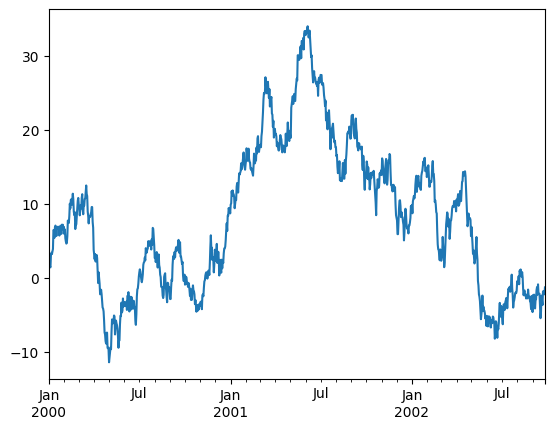

In [ ]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

cumsum은 누적합계를 해주는 메소드인듯하다   
https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html

<Figure size 640x480 with 0 Axes>

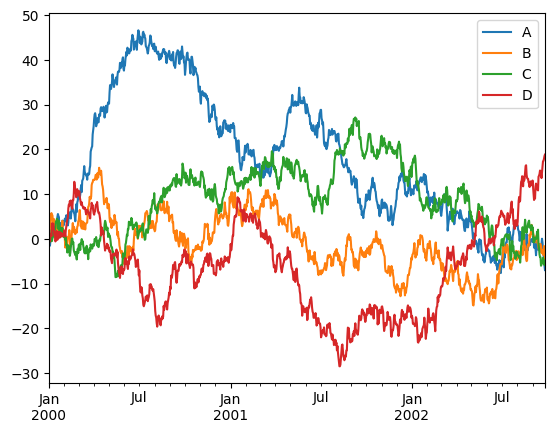

In [ ]:
df = pd.DataFrame(
    np.random.randn(1000,4), index=ts.index, columns=["A", "B", "C", "D" ]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

파이썬에서느 일반적으로 세미콜론 안 적는 듯한데 왜 적어준지 모르겠음    
https://chat.openai.com/share/4ae0e28e-30a6-4f04-bf75-6eb8dfc91ec1